### Importations

In [17]:
import numpy as np              # pour les tableaux
import matplotlib.pyplot as plt # pour les graphiques
import pandas as pd             # pour visualiser les données

# IV/A)2- Décroissance exponentielle

## Valeurs théoriques

In [30]:
L = 0.1     # H
C = 0.01e-6 # F
R = 100     # Ohm
Ttheo = 2*np.pi*np.sqrt(L*C)
print(f'T_theo = {Ttheo:.2e} s')
Qtheo = 1/R*np.sqrt(L/C)
print(f'Q_theo = {Qtheo:.2f}')

T_theo = 1.99e-04 s
Q_theo = 31.62


## Étape 1)

In [20]:
uinf = 0         # V

Texp = 2e-4      # s
n = np.array([k for k in range(5)])
nT = Texp*n

uCmax = [
    3,
    2,
    1,
    0.75,
    0.5
]

## Étape 2)

In [21]:
delta_list = np.log(
    [(uCmax[i]-uinf)/(uCmax[i+1]-uinf)
     for i in range(len(uCmax)-1)]
)

In [22]:
visu = pd.DataFrame([n, nT, uCmax, delta_list],
                    index=['n', 'nT', 'uCmax', 'delta']).T
visu

,n,nT,uCmax,delta
0,0.0,0.0000,3.00,0.405465
1,1.0,0.0002,2.00,0.693147
2,2.0,0.0004,1.00,0.287682
3,3.0,0.0006,0.75,0.405465
4,4.0,0.0008,0.50,NaN


## Étape 3)

### Création de la variable

In [25]:
ndelta = n[:-1]*delta_list
ndelta

array([0.        , 0.69314718, 0.57536414, 1.21639532])

### Calcul de la régression

In [27]:
X = nT[:-1]
Y = ndelta
a, b = np.polyfit(X, Y, 1)
print(f"a = {a:.3f}, b = {b:.3f}")


a = 1765.701, b = 0.092


### Tracé pour vérification

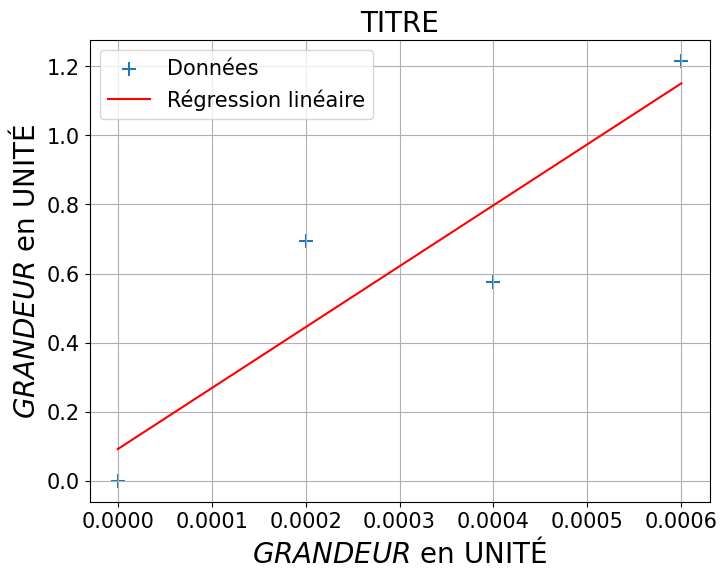

In [28]:
# découpage de l'intervalle pour fonction lisse
xliste = np.linspace(min(X), max(X), 100)
# Liste des points y_i obtenus par régression
yliste = a*xliste+b

plt.figure(figsize=(8, 6))
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('$GRANDEUR$ en UNITÉ', fontsize=20)
plt.ylabel('$GRANDEUR$ en UNITÉ', fontsize=20)

plt.scatter(X, Y, marker="+", s=100, label='Données')
plt.plot(xliste, yliste,
         'r', label='Régression linéaire')

plt.title("TITRE",
          fontsize=20)
plt.legend(fontsize=15)
plt.show()

## Question 3

In [33]:
Qexp = (np.pi)/(a*Texp)
print(f'Qexp = {Qexp:.2f}')
er = np.abs(Qexp-Qtheo)/(Qtheo)
print(f'e_r = {100*er:.2f} %')

Qexp = 8.90
e_r = 71.87 %


J'en conclue que…